In [11]:
#1. Explore this dataset using what you have learned in data preprocessing and data visualization 

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics

df = pd.read_csv("C:\\Users\\Admin\\Desktop\\IA\\kc_house_data.csv")
df.head(-5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21603,7852140040,20140825T000000,507250.0,3,2.50,2270,5536,2.0,0,0,...,8,2270,0,2003,0,98065,47.5389,-121.881,2270,5731
21604,9834201367,20150126T000000,429000.0,3,2.00,1490,1126,3.0,0,0,...,8,1490,0,2014,0,98144,47.5699,-122.288,1400,1230
21605,3448900210,20141014T000000,610685.0,4,2.50,2520,6023,2.0,0,0,...,9,2520,0,2014,0,98056,47.5137,-122.167,2520,6023
21606,7936000429,20150326T000000,1007500.0,4,3.50,3510,7200,2.0,0,0,...,9,2600,910,2009,0,98136,47.5537,-122.398,2050,6200


In [12]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [13]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


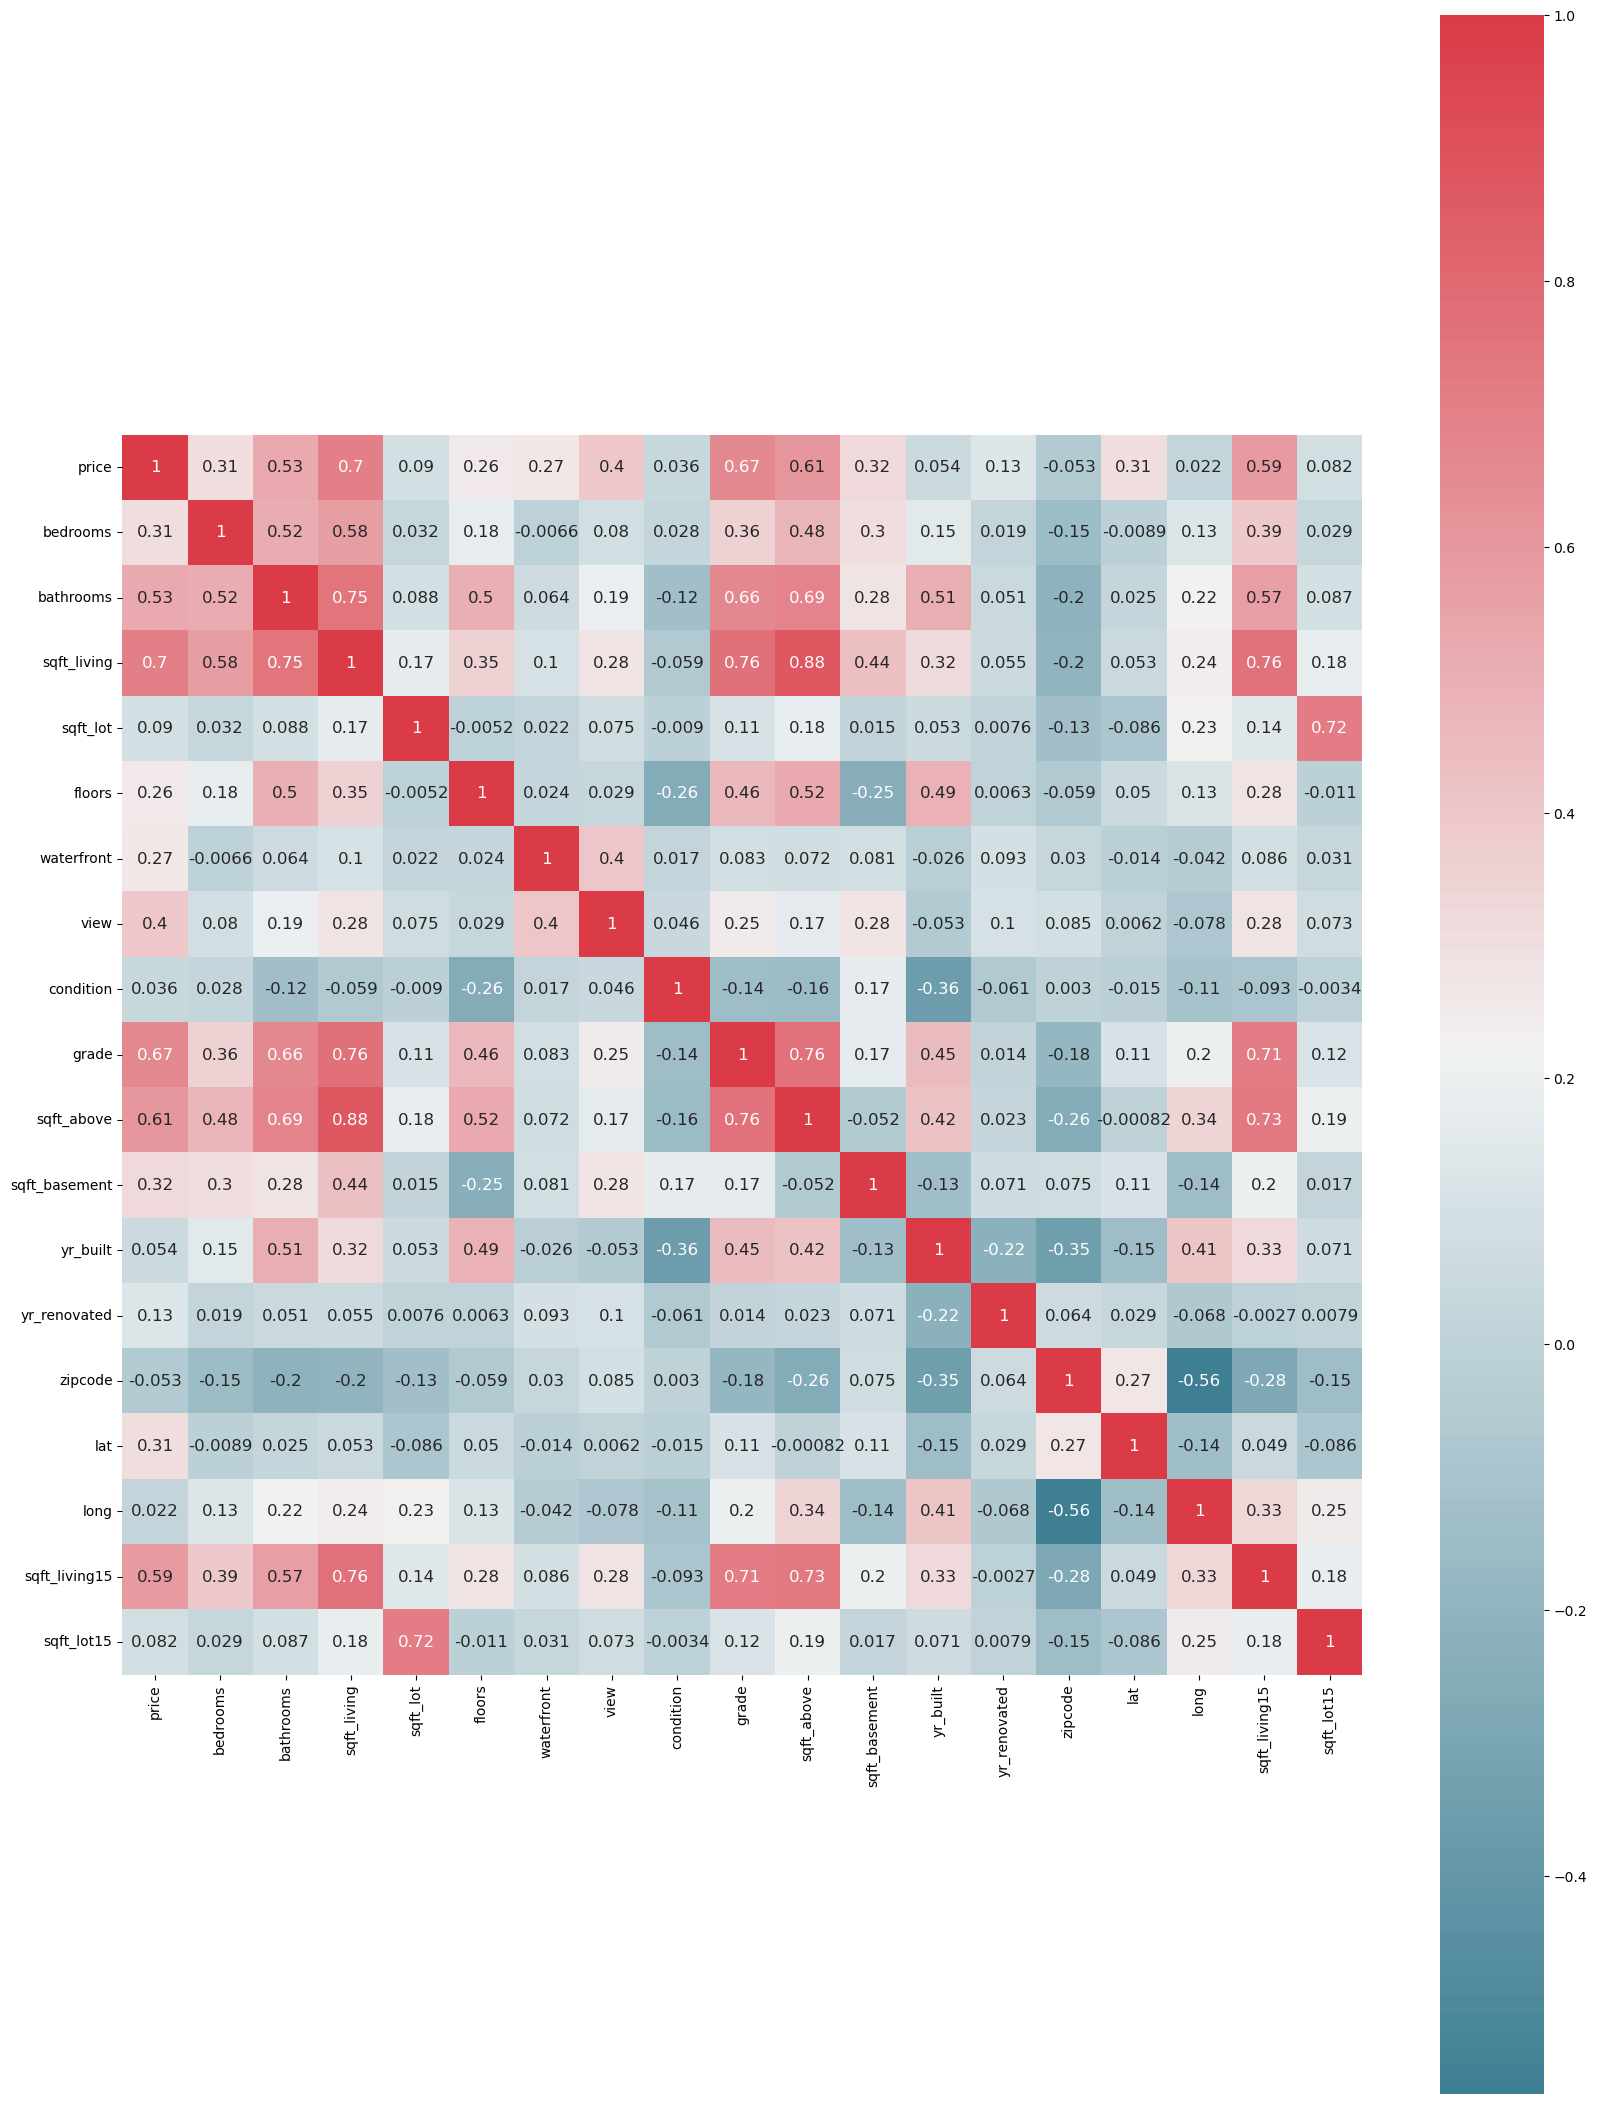

In [18]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 20 , 30))

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr,

        cmap = cmap,

        square=True,

        cbar_kws={ 'shrink' : .9 },

        ax=ax,

        annot = True,

        annot_kws = { 'fontsize' : 12 }

        )
plot_correlation_map(df[["price", "bedrooms","bathrooms","sqft_living","sqft_lot","floors","waterfront","view","condition","grade","sqft_above","sqft_basement","yr_built","yr_renovated","zipcode","lat","long","sqft_living15","sqft_lot15"]] )

2. Write a paragraph selecting the most important features (feature selection)

According to the heatmap of correlation between features :
- we will select this features (sqft_living/grade/sqft_above/sgft_living15) because : 
*correlation (price/sqft_living) = 0,7 ≈ 1
*correlation (price/grade) = 0,67 ≈ 1
*correlation (price/sqft_above) = 0,67 ≈ 1
*correlation (price/sqft_living15) = 0,59 ≈ 1


In [ ]:
#3. Split your dataset into a training set and a testing set. 
#4. Apply linear regression to your training set. 
#5. Plot the linear regression. 
#5. Measure the performance of linear regression using the testing set.


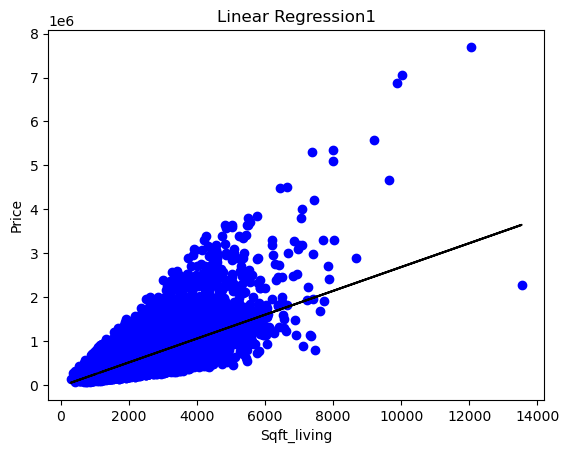

MSE : SQP 73003527587.22871
R squared : SQP 0.5015050183789083


In [15]:
x1=df["sqft_living"].values[:,np.newaxis]
y1=df["price"].values

x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.45,random_state=45)

SP=LinearRegression()
SP.fit(x1_train,y1_train)
predicted=SP.predict(x1_test)

plt.scatter(x1,y1,color="b")
plt.title("Linear Regression1")
plt.ylabel("Price")
plt.xlabel("Sqft_living")
plt.plot(x1,SP.predict(x1),color="k")
plt.show()

print("MSE : SQP", mean_squared_error(y1_test,predicted))
print("R squared : SQP", metrics.r2_score(y1_test,predicted))

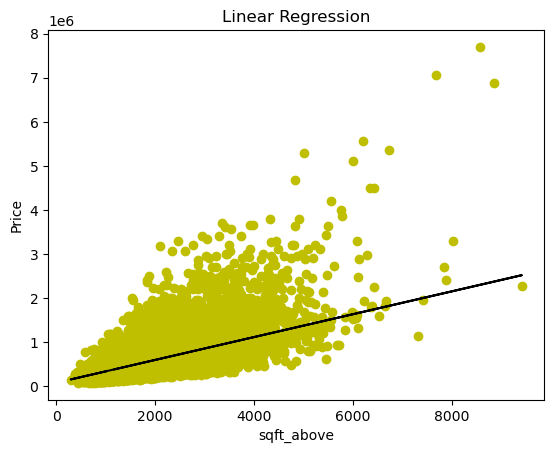

MSE : GP 92117854339.29398
R squared : GP 0.3709853533999078


In [19]:
x=df["sqft_above"].values[:,np.newaxis]
y=df["price"].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.45,random_state=45)

GP=LinearRegression()
GP.fit(x_train,y_train)
predicted=GP.predict(x_test)

plt.scatter(x,y,color="y")
plt.title("Linear Regression 2")
plt.ylabel("Price")
plt.xlabel("sqft_above")
plt.plot(x,GP.predict(x),color="k")
plt.show()

print("MSE : GP", mean_squared_error(y_test,predicted))
print("R squared : GP", metrics.r2_score(y_test,predicted))

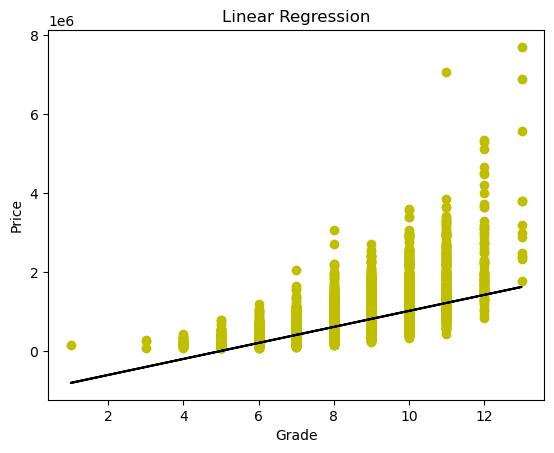

MSE : GP 80902259332.75977
R squared : GP 0.4475695680458581


In [20]:
x=df["grade"].values[:,np.newaxis]
y=df["price"].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.45,random_state=45)

GP=LinearRegression()
GP.fit(x_train,y_train)
predicted=GP.predict(x_test)

plt.scatter(x,y,color="y")
plt.title("Linear Regression 3")
plt.ylabel("Price")
plt.xlabel("Grade")
plt.plot(x,GP.predict(x),color="k")
plt.show()

print("MSE : GP", mean_squared_error(y_test,predicted))
print("R squared : GP", metrics.r2_score(y_test,predicted))

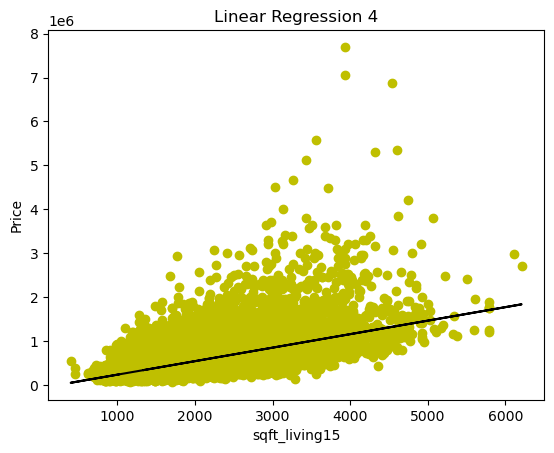

MSE : GP 97858680284.40428
R squared : GP 0.33178487886697183


In [22]:
x=df["sqft_living15"].values[:,np.newaxis]
y=df["price"].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.45,random_state=45)

GP=LinearRegression()
GP.fit(x_train,y_train)
predicted=GP.predict(x_test)

plt.scatter(x,y,color="y")
plt.title("Linear Regression 4")
plt.ylabel("Price")
plt.xlabel("sqft_living15")
plt.plot(x,GP.predict(x),color="k")
plt.show()

print("MSE : GP", mean_squared_error(y_test,predicted))
print("R squared : GP", metrics.r2_score(y_test,predicted))

From the visualization and model performance, it's evident that the SP (sqft_living/price) model outperforms all other linear regression models.

In [24]:
a=df[["sqft_living","grade"]]
b=df["price"].values
a_train,a_test,b_train,b_test=train_test_split(a,b,test_size=0.45,random_state=45)


SGP=LinearRegression()
SGP.fit(a_train,b_train)
predicted=SGP.predict(a_test)



print("MSE", mean_squared_error(b_test,predicted))
print("R squared", metrics.r2_score(b_test,predicted))

MSE 67283560503.864845
R squared 0.5405630609192189


Based on the test results, the multi-linear regression model shows slightly better performance compared to the linear regression model SP.

In [25]:
from sklearn.preprocessing import PolynomialFeatures

p=data[["sqft_living","grade"]]
d=data["price"].values

p_train, p_test, d_train, d_test = train_test_split(p, d, test_size=0.45, random_state=45)  #splitting data
lg=LinearRegression()
poly=PolynomialFeatures(degree=3)

p_train_fit = poly.fit_transform(p_train) #transforming our input data
lg.fit(p_train_fit, d_train)
p_test_ = poly.fit_transform(p_test)
predicted = lg.predict(p_test_)


print("MSE: ", metrics.mean_squared_error(d_test, predicted))
print("R squared: ", metrics.r2_score(d_test,predicted))

MSE:  67704239817.27546
R squared:  0.5376905075846362


The multi-linear regression model outperforms all other models, demonstrating superior performance compared to both the polynomial and linear regression models.